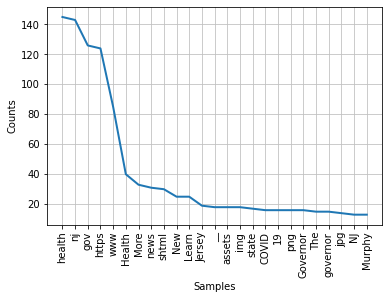

In [2]:
# Gavin Rozzi
# Data Visualization
# COVID-19 visualization project

import pandas as pd
import requests
import html2text
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

# Obtain all state URLs from the COVID Tracking Project
df_tracker_urls = pd.read_json("https://covidtracking.com/api/urls")

# Get New Jersey URL and details
nj = df_tracker_urls[df_tracker_urls['stateId'] == 'NJ'] 

url = nj['url']

# Clean messy response
url = result = ''.join(i for i in url if not i.isdigit())

# Use NJ url to scrape the page
html = requests.get(url)

# Convert to plain text + strip html
plain = html.text
plain = html2text.html2text(plain)

# Break the page up into sentences so it can be properly tokenized
sentences = nltk.tokenize.sent_tokenize(plain)

# Tokenize the text for processing
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(plain)

# Define stopwords
sw = nltk.corpus.stopwords.words('english')

# Remove stopwords. These are not needed.
words = [word for word in tokens if word not in sw]

# Create a frequency distribution of the words
freqdist = nltk.FreqDist(words)

# Plot the first 25 words
freqdist.plot(25)

